In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('owid-covid-data.csv')

In [4]:
covid_mor.shape

(1674, 67)

In [5]:
print(df.isnull().sum())

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [6]:
theshold=len(covid_mor)*0.5

In [7]:
covid_mor['total_cases'].max()

1279115.0

In [8]:
covid_mor = covid_mor[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated']]

In [9]:
theshold

837.0

In [10]:
covid_mor

,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated
255416,2020-01-05,Morocco,0.0,0.0,0.0,0.0,NaN,NaN
255417,2020-01-06,Morocco,0.0,0.0,0.0,0.0,NaN,NaN
255418,2020-01-07,Morocco,0.0,0.0,0.0,0.0,NaN,NaN
255419,2020-01-08,Morocco,0.0,0.0,0.0,0.0,NaN,NaN
255420,2020-01-09,Morocco,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
257085,2024-07-31,Morocco,1279115.0,0.0,16305.0,0.0,NaN,NaN
257086,2024-08-01,Morocco,1279115.0,0.0,16305.0,0.0,NaN,NaN
257087,2024-08-02,Morocco,1279115.0,0.0,16305.0,0.0,NaN,NaN
257088,2024-08-03,Morocco,1279115.0,0.0,16305.0,0.0,NaN,NaN


In [11]:
fil_covid_mor = covid_mor.loc[:, covid_mor.notnull().sum() > theshold]

In [12]:
fil_covid_mor.columns 

Index(['date', 'location', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths'],
      dtype='object')

In [13]:
fil_covid_mor.describe()

,total_cases,new_cases,total_deaths,new_deaths
count,1.674000e+03,1674.000000,1674.000000,1674.000000
mean,8.689610e+05,764.106930,11828.441458,9.740143
std,4.880729e+05,4615.808737,6083.332763,57.832714
min,0.000000e+00,0.000000,0.000000,0.000000
25%,4.809480e+05,0.000000,8548.000000,0.000000
50%,1.164345e+06,0.000000,16062.000000,0.000000
75%,1.275003e+06,0.000000,16297.000000,0.000000
max,1.279115e+06,64784.000000,16305.000000,744.000000


In [15]:
fil_covid_mor.fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\1192267523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_covid_mor.fillna(0, inplace=True)


In [14]:
fil_covid_mor['date'] = pd.to_datetime(df['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\3947937242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_covid_mor['date'] = pd.to_datetime(df['date'])


In [18]:
fil_covid_mor

,date,location,total_cases,new_cases,total_deaths,new_deaths
255416,2020-01-05,Morocco,0.0,0.0,0.0,0.0
255417,2020-01-06,Morocco,0.0,0.0,0.0,0.0
255418,2020-01-07,Morocco,0.0,0.0,0.0,0.0
255419,2020-01-08,Morocco,0.0,0.0,0.0,0.0
255420,2020-01-09,Morocco,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
257085,2024-07-31,Morocco,1279115.0,0.0,16305.0,0.0
257086,2024-08-01,Morocco,1279115.0,0.0,16305.0,0.0
257087,2024-08-02,Morocco,1279115.0,0.0,16305.0,0.0
257088,2024-08-03,Morocco,1279115.0,0.0,16305.0,0.0


In [19]:
fil_covid_mor.columns

Index(['date', 'location', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths'],
      dtype='object')

In [23]:
Max_total_cases=fil_covid_mor['total_cases'].max()
Max_total_death=fil_covid_mor['total_deaths'].max()



In [24]:
print(Max_total_cases)

1279115.0


In [25]:
print(Max_total_death)

16305.0


In [26]:
print(fil_covid_mor.describe())

        total_cases     new_cases  total_deaths   new_deaths
count  1.674000e+03   1674.000000   1674.000000  1674.000000
mean   8.689610e+05    764.106930  11828.441458     9.740143
std    4.880729e+05   4615.808737   6083.332763    57.832714
min    0.000000e+00      0.000000      0.000000     0.000000
25%    4.809480e+05      0.000000   8548.000000     0.000000
50%    1.164345e+06      0.000000  16062.000000     0.000000
75%    1.275003e+06      0.000000  16297.000000     0.000000
max    1.279115e+06  64784.000000  16305.000000   744.000000


In [29]:
#1.plot total case over time 

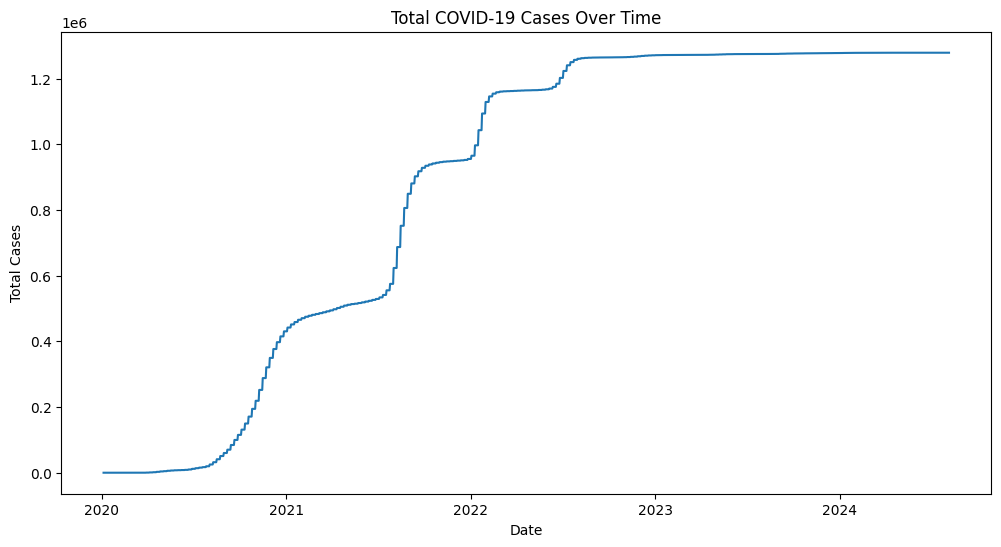

In [30]:
# Group by date and sum total cases
df_global = fil_covid_mor.groupby('date').sum().reset_index()

# Plot total cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', data=df_global)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total cases ')
plt.show()

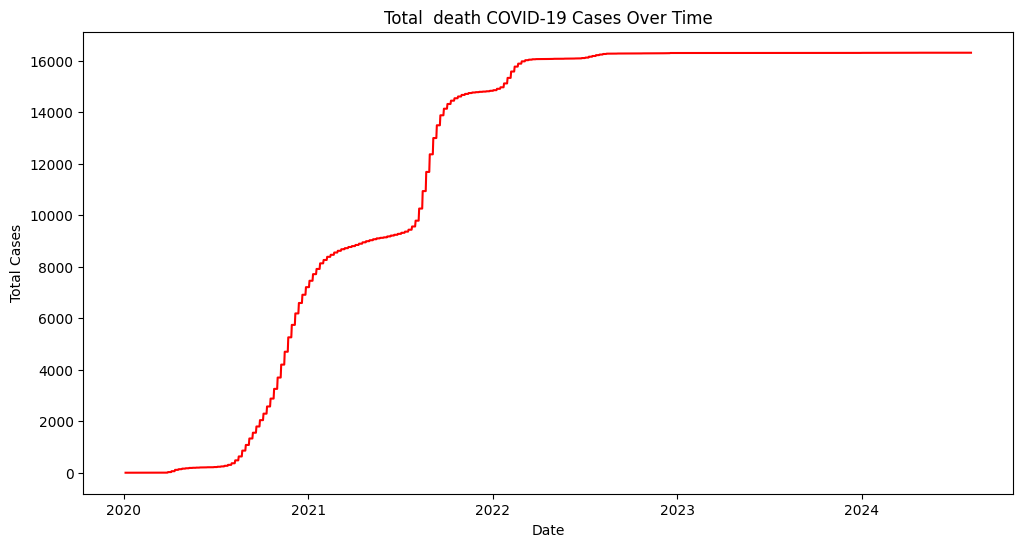

In [31]:
# Group by date and sum total cases
df_global = fil_covid_mor.groupby('date').sum().reset_index()

# Plot total total death cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_deaths', data=df_global,color= 'red')
plt.title('Total  death COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.show()

In [32]:
#Top ten countries 

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\699440707.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_latest = df.groupby('location').max().reset_index()


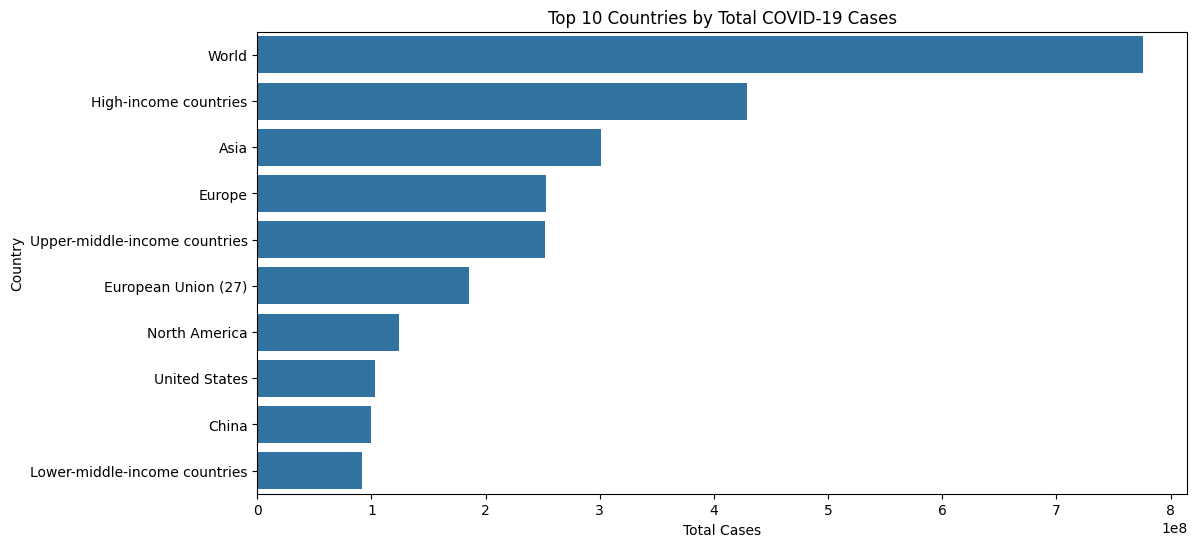

In [33]:
# Get the latest data for each country
df_latest = df.groupby('location').max().reset_index()

# Sort by total cases and select top 10
top_10_countries = df_latest.sort_values(by='total_cases', ascending=False).head(10)

# Plot top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_10_countries)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

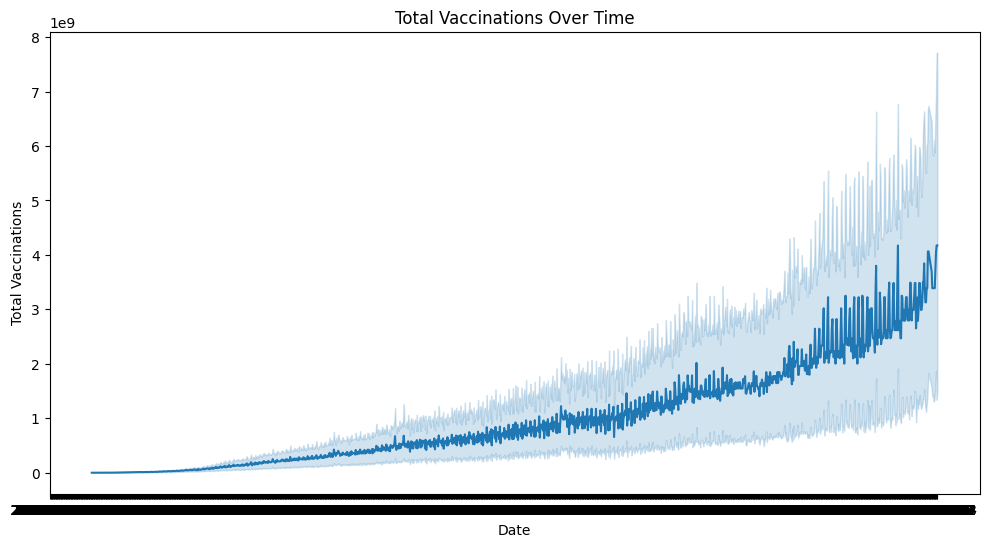

In [35]:
# Plot total vaccinations over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_vaccinations', data=df)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()

In [36]:
# Calculate death rate (total deaths / total cases)
df_latest['death_rate'] = (df_latest['total_deaths'] / df_latest['total_cases']) * 100

# Display countries with the highest death rate
print(df_latest[['location', 'death_rate']].sort_values(by='death_rate', ascending=False).head(10))

                   location  death_rate
252                   Yemen   18.074508
217                   Sudan    7.885237
221                   Syria    5.508246
210                 Somalia    4.979147
178                    Peru    4.881293
63                    Egypt    4.811801
143                  Mexico    4.390745
28   Bosnia and Herzegovina    4.060783
124                 Liberia    3.634116
0               Afghanistan    3.400308
